# Sales, revenue and churn Analysis

In [1]:
import pandas as pd
%matplotlib inline

### 1. First we are loading both datasets

In [2]:
sales = pd.read_excel('sales_data.xlsx')
sales.head()

,customer_id,date,flavor,market
0,3488,2010-01-01,Apple,AUT
1,3480,2010-01-01,Apple,CH
2,9519,2010-01-01,Doughnut,CH
3,4530,2010-01-02,Doughnut,DEU
4,5019,2010-01-02,Coffee,DEU


In [3]:
prices = pd.read_excel('prices.xlsx')
prices.head()

,market,flavor,price
0,DEU,Apple,640.0
1,AUT,Apple,700.0
2,CH,Apple,580.0
3,FRA,Apple,760.0
4,ITA,Apple,550.0


In [4]:
# combine data into a single dataframe to run EDA (revenue, etc...)
dfx = pd.merge(sales, prices, how = 'left', left_on = ['flavor', 'market'], right_on =['flavor', 'market'])

In [5]:
dfx.head()

,customer_id,date,flavor,market,price
0,3488,2010-01-01,Apple,AUT,700.0
1,3480,2010-01-01,Apple,CH,580.0
2,9519,2010-01-01,Doughnut,CH,590.0
3,4530,2010-01-02,Doughnut,DEU,610.0
4,5019,2010-01-02,Coffee,DEU,1470.0


In [6]:
df = dfx

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['my'] = df['date'].dt.strftime('%Y %B')

In [9]:
df1 = df.groupby(['my', 'flavor'])['price'].sum().unstack(1)
df2 = df.groupby(['my', 'flavor'])['customer_id'].count().unstack(1)
df3 = df.groupby(['my', 'market'])['price'].sum().unstack(1)
df4 = df.groupby(['my', 'market'])['customer_id'].count().unstack(1)

In [10]:
df = df.set_index(pd.to_datetime(df['date']))

In [11]:
df1 = df1.fillna(0)
df2 = df2.fillna(0)
df3 = df3.fillna(0)
df4 = df4.fillna(0)

In [12]:
df1.head()

flavor,Apple,Banana,Coffee,Doughnut
my,,,,
2010 April,18390.0,24930.0,35280.0,14030.0
2010 August,26650.0,45650.0,57490.0,12440.0
2010 December,26490.0,35580.0,52140.0,13850.0
2010 February,18850.0,18720.0,30380.0,13360.0
2010 January,18180.0,18750.0,32210.0,13480.0


#### Below revenue distribution per product type. Notice volatility at day level

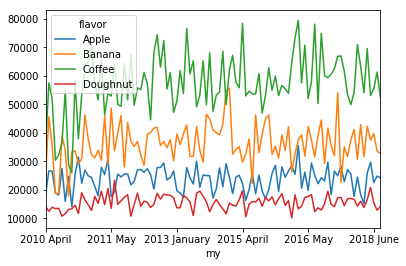

In [13]:
df1.plot()

In [14]:
dfaux = df.groupby(['year', 'flavor'])['price'].sum().unstack(1)

#### Monthly agregation of the data solves volatility and makes it much more readable

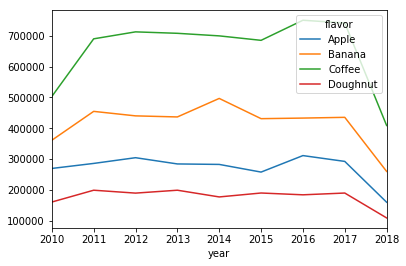

In [15]:
dfaux.plot()

#### Same as above but in this case the timeline shows product versus number of costumers

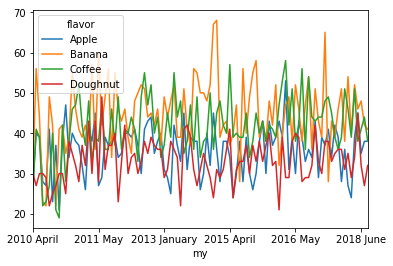

In [16]:
df2.plot()

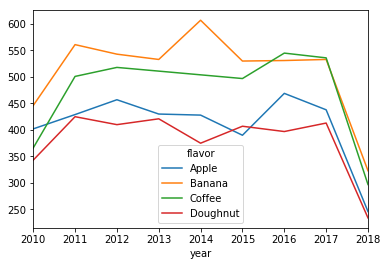

In [17]:
df.groupby(['year', 'flavor'])['customer_id'].count().unstack(1).plot()

#### Now the viz portrays revenue per market

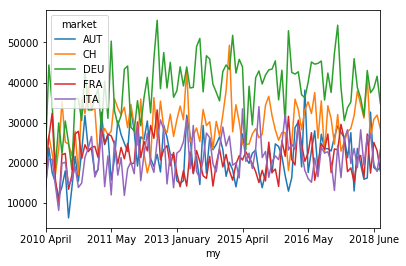

In [18]:
df3.plot.line()

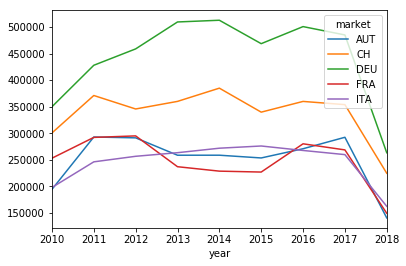

In [19]:
df.groupby(['year', 'market'])['price'].sum().unstack(1).plot()

#### Revenue per marker at customer count level

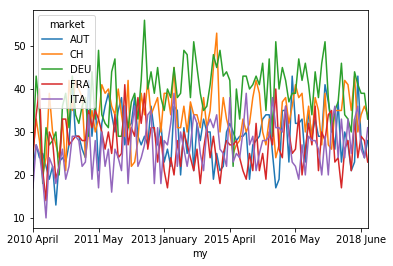

In [20]:
df4.plot()

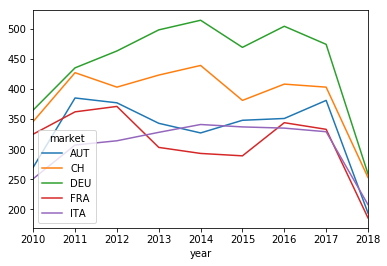

In [21]:
df.groupby(['year', 'market'])['customer_id'].count().unstack(1).plot()

#### Totals per market per flavor

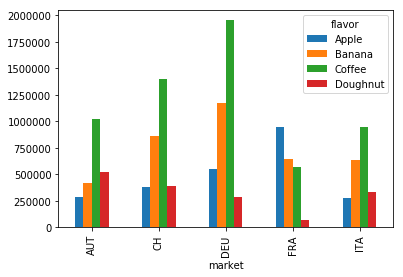

In [22]:
df.groupby(['market','flavor'])['price'].sum().unstack(1).plot.bar()

#### AVG Revenue per customer: based on country and broken down by flavor

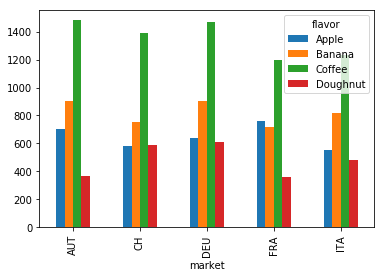

In [23]:
(df.groupby(['market','flavor'])['price'].sum()/df.groupby(['market','flavor'])['customer_id'].count()).unstack(1).plot.bar()

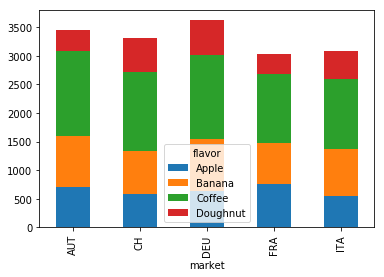

In [24]:
(df.groupby(['market','flavor'])['price'].sum()/df.groupby(['market','flavor'])['customer_id'].count()).unstack(1).plot.bar(stacked = True)

##### Percentages per TOTAL MARKET SHARE

In [25]:
df.groupby('market')['price'].sum()/df.groupby(['market','flavor'])['price'].sum()

market  flavor  
AUT     Apple        7.845017
        Banana       5.368431
        Coffee       2.198406
        Doughnut     4.321867
CH      Apple        7.928322
        Banana       3.508872
        Coffee       2.169379
        Doughnut     7.817597
DEU     Apple        7.167261
        Banana       3.375749
        Coffee       2.035682
        Doughnut    13.696687
FRA     Apple        2.354017
        Banana       3.447723
        Coffee       3.927343
        Doughnut    32.762493
ITA     Apple        7.920648
        Banana       3.444003
        Coffee       2.313823
        Doughnut     6.613636
Name: price, dtype: float64

# Now its time to look into consumer preferences
### First purchase versus following purchases

In [26]:
Pdf = dfx
Pdf.head()

,customer_id,date,flavor,market,price,month,year,my
0,3488,2010-01-01,Apple,AUT,700.0,1,2010,2010 January
1,3480,2010-01-01,Apple,CH,580.0,1,2010,2010 January
2,9519,2010-01-01,Doughnut,CH,590.0,1,2010,2010 January
3,4530,2010-01-02,Doughnut,DEU,610.0,1,2010,2010 January
4,5019,2010-01-02,Coffee,DEU,1470.0,1,2010,2010 January


In [1]:
# arranging dataset to implement prreference logic
Pdf = Pdf.sort_values(by = ['customer_id', 'date'])

NameError: name 'Pdf' is not defined

In [28]:
Pdf.head(10)

,customer_id,date,flavor,market,price,month,year,my
15344,0,2018-03-29,Coffee,DEU,1470.0,3,2018,2018 March
15889,0,2018-07-14,Banana,DEU,900.0,7,2018,2018 July
15955,1,2018-07-27,Coffee,CH,1390.0,7,2018,2018 July
10936,2,2015-12-12,Coffee,DEU,1470.0,12,2015,2015 December
11734,2,2016-05-10,Coffee,DEU,1470.0,5,2016,2016 May
15296,3,2018-03-19,Apple,CH,580.0,3,2018,2018 March
15436,3,2018-04-14,Apple,CH,580.0,4,2018,2018 April
734,4,2010-07-15,Apple,DEU,640.0,7,2010,2010 July
1120,4,2010-10-01,Banana,DEU,900.0,10,2010,2010 October
10008,5,2015-06-03,Coffee,CH,1390.0,6,2015,2015 June


In [29]:
Pdf['id2'] = Pdf['customer_id'].shift()

In [30]:
Pdf.head(10)

,customer_id,date,flavor,market,price,month,year,my,id2
15344,0,2018-03-29,Coffee,DEU,1470.0,3,2018,2018 March,NaN
15889,0,2018-07-14,Banana,DEU,900.0,7,2018,2018 July,0.0
15955,1,2018-07-27,Coffee,CH,1390.0,7,2018,2018 July,0.0
10936,2,2015-12-12,Coffee,DEU,1470.0,12,2015,2015 December,1.0
11734,2,2016-05-10,Coffee,DEU,1470.0,5,2016,2016 May,2.0
15296,3,2018-03-19,Apple,CH,580.0,3,2018,2018 March,2.0
15436,3,2018-04-14,Apple,CH,580.0,4,2018,2018 April,3.0
734,4,2010-07-15,Apple,DEU,640.0,7,2010,2010 July,3.0
1120,4,2010-10-01,Banana,DEU,900.0,10,2010,2010 October,4.0
10008,5,2015-06-03,Coffee,CH,1390.0,6,2015,2015 June,4.0


In [31]:
# first stands for preferences, 
# false means following and true is first purchase
Pdf['first'] = Pdf['customer_id'] != Pdf['id2']

In [32]:
Pdf.head()

,customer_id,date,flavor,market,price,month,year,my,id2,first
15344,0,2018-03-29,Coffee,DEU,1470.0,3,2018,2018 March,NaN,True
15889,0,2018-07-14,Banana,DEU,900.0,7,2018,2018 July,0.0,False
15955,1,2018-07-27,Coffee,CH,1390.0,7,2018,2018 July,0.0,True
10936,2,2015-12-12,Coffee,DEU,1470.0,12,2015,2015 December,1.0,True
11734,2,2016-05-10,Coffee,DEU,1470.0,5,2016,2016 May,2.0,False


### Visualizing: following vs first purchase per product per market

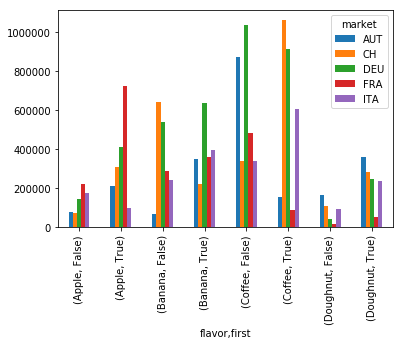

In [33]:
Pdf.groupby(['market','flavor', 'first'])['price'].sum().unstack(0).plot.bar()

# Customer Lifetime Value based on preferences

In [34]:
sf= Pdf.groupby(['market','flavor'])['price'].sum()
rd = Pdf.groupby(['market','flavor', 'first'])['customer_id'].count()

In [35]:
hh = sf/rd

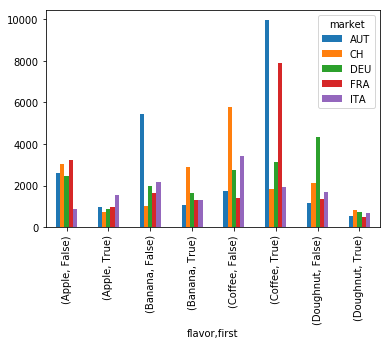

In [36]:
hh.unstack(0).plot.bar()

In [37]:
aa= Pdf.groupby('flavor')['price'].sum()
dd = Pdf.groupby(['flavor','first'])['customer_id'].count()
rr = aa/dd

## Product preference weights

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000287E8552048>,
      dtype=object)

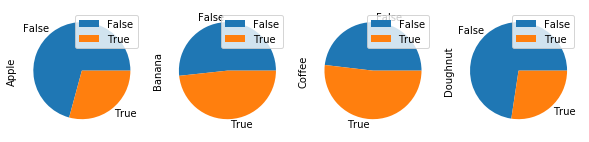

In [38]:
rr.unstack(0).plot.pie(subplots = True, figsize = (10,10))

# Markov Chain: product to churn funnel predictions
* implementation of funnel states to probability mapping
* visualization
* insights
* next steps

#### Getting Probability matrix:

In [39]:
#create a column that stores flavor change
Pdf['flavor_before'] = Pdf['flavor'].shift(1)
Pdf.head(10)

,customer_id,date,flavor,market,price,month,year,my,id2,first,flavor_before
15344,0,2018-03-29,Coffee,DEU,1470.0,3,2018,2018 March,NaN,True,NaN
15889,0,2018-07-14,Banana,DEU,900.0,7,2018,2018 July,0.0,False,Coffee
15955,1,2018-07-27,Coffee,CH,1390.0,7,2018,2018 July,0.0,True,Banana
10936,2,2015-12-12,Coffee,DEU,1470.0,12,2015,2015 December,1.0,True,Coffee
11734,2,2016-05-10,Coffee,DEU,1470.0,5,2016,2016 May,2.0,False,Coffee
15296,3,2018-03-19,Apple,CH,580.0,3,2018,2018 March,2.0,True,Coffee
15436,3,2018-04-14,Apple,CH,580.0,4,2018,2018 April,3.0,False,Apple
734,4,2010-07-15,Apple,DEU,640.0,7,2010,2010 July,3.0,True,Apple
1120,4,2010-10-01,Banana,DEU,900.0,10,2010,2010 October,4.0,False,Apple
10008,5,2015-06-03,Coffee,CH,1390.0,6,2015,2015 June,4.0,True,Banana


In [40]:
Pdf['maxdate'] = Pdf['date'].max()

In [41]:
Pdf.head(50)

,customer_id,date,flavor,market,price,month,year,my,id2,first,flavor_before,maxdate
15344,0,2018-03-29,Coffee,DEU,1470.0,3,2018,2018 March,NaN,True,NaN,2018-07-31
15889,0,2018-07-14,Banana,DEU,900.0,7,2018,2018 July,0.0,False,Coffee,2018-07-31
15955,1,2018-07-27,Coffee,CH,1390.0,7,2018,2018 July,0.0,True,Banana,2018-07-31
10936,2,2015-12-12,Coffee,DEU,1470.0,12,2015,2015 December,1.0,True,Coffee,2018-07-31
11734,2,2016-05-10,Coffee,DEU,1470.0,5,2016,2016 May,2.0,False,Coffee,2018-07-31
15296,3,2018-03-19,Apple,CH,580.0,3,2018,2018 March,2.0,True,Coffee,2018-07-31
15436,3,2018-04-14,Apple,CH,580.0,4,2018,2018 April,3.0,False,Apple,2018-07-31
734,4,2010-07-15,Apple,DEU,640.0,7,2010,2010 July,3.0,True,Apple,2018-07-31
1120,4,2010-10-01,Banana,DEU,900.0,10,2010,2010 October,4.0,False,Apple,2018-07-31
10008,5,2015-06-03,Coffee,CH,1390.0,6,2015,2015 June,4.0,True,Banana,2018-07-31


In [42]:
Pdf['churn'] = abs(Pdf['date']-Pdf['maxdate'])

* idn2 is a shifted id column used as last purchase pointer

In [43]:
Pdf['customer_idn2'] = Pdf['customer_id'].shift(-1)

In [44]:
Pdf.head(100)

,customer_id,date,flavor,market,price,month,year,my,id2,first,flavor_before,maxdate,churn,customer_idn2
15344,0,2018-03-29,Coffee,DEU,1470.0,3,2018,2018 March,NaN,True,NaN,2018-07-31,124 days,0.0
15889,0,2018-07-14,Banana,DEU,900.0,7,2018,2018 July,0.0,False,Coffee,2018-07-31,17 days,1.0
15955,1,2018-07-27,Coffee,CH,1390.0,7,2018,2018 July,0.0,True,Banana,2018-07-31,4 days,2.0
10936,2,2015-12-12,Coffee,DEU,1470.0,12,2015,2015 December,1.0,True,Coffee,2018-07-31,962 days,2.0
11734,2,2016-05-10,Coffee,DEU,1470.0,5,2016,2016 May,2.0,False,Coffee,2018-07-31,812 days,3.0
15296,3,2018-03-19,Apple,CH,580.0,3,2018,2018 March,2.0,True,Coffee,2018-07-31,134 days,3.0
15436,3,2018-04-14,Apple,CH,580.0,4,2018,2018 April,3.0,False,Apple,2018-07-31,108 days,4.0
734,4,2010-07-15,Apple,DEU,640.0,7,2010,2010 July,3.0,True,Apple,2018-07-31,2938 days,4.0
1120,4,2010-10-01,Banana,DEU,900.0,10,2010,2010 October,4.0,False,Apple,2018-07-31,2860 days,5.0
10008,5,2015-06-03,Coffee,CH,1390.0,6,2015,2015 June,4.0,True,Banana,2018-07-31,1154 days,6.0


In [45]:
type(Pdf['churn'][0])

pandas._libs.tslibs.timedeltas.Timedelta

In [46]:
type(Pdf.groupby('customer_id')['date'].max())

pandas.core.series.Series

In [47]:
# creating an auxiliary flag as churn/churned could be used for reporting
from datetime import timedelta
Pdf['churned']= Pdf['churn']>= timedelta(days= 180) # && Pdf.groupby('customer_id')['date'].max())
#Pdf = Pdf.drop('churntest', axis=1)
Pdf.head(100)

,customer_id,date,flavor,market,price,month,year,my,id2,first,flavor_before,maxdate,churn,customer_idn2,churned
15344,0,2018-03-29,Coffee,DEU,1470.0,3,2018,2018 March,NaN,True,NaN,2018-07-31,124 days,0.0,False
15889,0,2018-07-14,Banana,DEU,900.0,7,2018,2018 July,0.0,False,Coffee,2018-07-31,17 days,1.0,False
15955,1,2018-07-27,Coffee,CH,1390.0,7,2018,2018 July,0.0,True,Banana,2018-07-31,4 days,2.0,False
10936,2,2015-12-12,Coffee,DEU,1470.0,12,2015,2015 December,1.0,True,Coffee,2018-07-31,962 days,2.0,True
11734,2,2016-05-10,Coffee,DEU,1470.0,5,2016,2016 May,2.0,False,Coffee,2018-07-31,812 days,3.0,True
15296,3,2018-03-19,Apple,CH,580.0,3,2018,2018 March,2.0,True,Coffee,2018-07-31,134 days,3.0,False
15436,3,2018-04-14,Apple,CH,580.0,4,2018,2018 April,3.0,False,Apple,2018-07-31,108 days,4.0,False
734,4,2010-07-15,Apple,DEU,640.0,7,2010,2010 July,3.0,True,Apple,2018-07-31,2938 days,4.0,True
1120,4,2010-10-01,Banana,DEU,900.0,10,2010,2010 October,4.0,False,Apple,2018-07-31,2860 days,5.0,True
10008,5,2015-06-03,Coffee,CH,1390.0,6,2015,2015 June,4.0,True,Banana,2018-07-31,1154 days,6.0,True


In [48]:
churns = Pdf[Pdf['first']==False].groupby(['churned','flavor_before', 'flavor'])['id2'].count().unstack(1)

#### Creating a column that consolidates last state(product) or churn

In [49]:
def last_purchase(Pdf):
   '''compare first purchase vs folowing, assign last purchase flag'''

   new_column = []

   for i,f in Pdf[['customer_id','customer_idn2']].iterrows():
       if f['customer_id'] == f['customer_idn2']:
           k = 'else'
       else:
           k = 'last'

       new_column.append(k)



   return new_column

In [50]:
Pdf['last_purchase'] = last_purchase(Pdf)

In [51]:
def nfc():
    '''Integrate churned/las flavor values in last purchase column '''
   new_column = []

   for i,f in Pdf.iterrows():
       lastdate = Pdf['date'].max()
       if abs((lastdate - f['date']).days) >= 180 and f['last_purchase'] == 'last':
           k = 'churn'
       else:
           k = f['flavor']
       new_column.append(k)
   print(new_column)
   return new_column

In [52]:
Pdf['final_flavor'] = nfc()

['Coffee', 'Banana', 'Coffee', 'Coffee', 'churn', 'Apple', 'Apple', 'Apple', 'churn', 'churn', 'churn', 'churn', 'Coffee', 'churn', 'Banana', 'churn', 'Doughnut', 'Banana', 'churn', 'Coffee', 'Banana', 'churn', 'Coffee', 'Banana', 'churn', 'churn', 'Banana', 'churn', 'Banana', 'churn', 'Apple', 'churn', 'Apple', 'churn', 'churn', 'Apple', 'churn', 'Doughnut', 'churn', 'Coffee', 'churn', 'Coffee', 'churn', 'churn', 'Apple', 'Banana', 'churn', 'Apple', 'churn', 'Doughnut', 'churn', 'Coffee', 'churn', 'churn', 'Doughnut', 'Coffee', 'churn', 'Doughnut', 'Doughnut', 'churn', 'churn', 'churn', 'Banana', 'Coffee', 'Banana', 'churn', 'churn', 'churn', 'Coffee', 'churn', 'Doughnut', 'churn', 'Banana', 'churn', 'Apple', 'churn', 'churn', 'Doughnut', 'Banana', 'Apple', 'Banana', 'churn', 'Banana', 'churn', 'churn', 'churn', 'Apple', 'churn', 'Apple', 'churn', 'Coffee', 'churn', 'churn', 'churn', 'churn', 'Doughnut', 'churn', 'Banana', 'churn', 'Apple', 'churn', 'Coffee', 'churn', 'Apple', 'Coffee

In [53]:
Pdf.head()

,customer_id,date,flavor,market,price,month,year,my,id2,first,flavor_before,maxdate,churn,customer_idn2,churned,last_purchase,final_flavor
15344,0,2018-03-29,Coffee,DEU,1470.0,3,2018,2018 March,NaN,True,NaN,2018-07-31,124 days,0.0,False,else,Coffee
15889,0,2018-07-14,Banana,DEU,900.0,7,2018,2018 July,0.0,False,Coffee,2018-07-31,17 days,1.0,False,last,Banana
15955,1,2018-07-27,Coffee,CH,1390.0,7,2018,2018 July,0.0,True,Banana,2018-07-31,4 days,2.0,False,last,Coffee
10936,2,2015-12-12,Coffee,DEU,1470.0,12,2015,2015 December,1.0,True,Coffee,2018-07-31,962 days,2.0,True,else,Coffee
11734,2,2016-05-10,Coffee,DEU,1470.0,5,2016,2016 May,2.0,False,Coffee,2018-07-31,812 days,3.0,True,last,churn


#### creating the matrix of probabilities

In [82]:
# condition first = false grants same customer and count by change states
prob = Pdf[Pdf['first']==False].groupby(['flavor_before', 'final_flavor'])['id2'].count().unstack()
prob

final_flavor,Apple,Banana,Coffee,Doughnut,churn
flavor_before,,,,,
Apple,93,191,184,57,1055
Banana,112,196,181,71,1218
Coffee,73,186,158,75,1122
Doughnut,75,121,176,112,1002


In [84]:
# get the transition prob matrix by counting state change and dividing it by total
P = round (prob/prob.sum(0),2)
P

final_flavor,Apple,Banana,Coffee,Doughnut,churn
flavor_before,,,,,
Apple,0.26,0.28,0.26,0.18,0.24
Banana,0.32,0.28,0.26,0.23,0.28
Coffee,0.21,0.27,0.23,0.24,0.26
Doughnut,0.21,0.17,0.25,0.36,0.23


In [85]:
P = P.T
P.insert(4,'churn_before',[0.00,0.00,0.00,0.00,1.00])

In [86]:
P = P.T
P # finally the probability matrix is complete and ready

final_flavor,Apple,Banana,Coffee,Doughnut,churn
flavor_before,,,,,
Apple,0.26,0.28,0.26,0.18,0.24
Banana,0.32,0.28,0.26,0.23,0.28
Coffee,0.21,0.27,0.23,0.24,0.26
Doughnut,0.21,0.17,0.25,0.36,0.23
churn_before,0.00,0.00,0.00,0.00,1.00


In [89]:
# This is S, for the whole dataset
Pdf.groupby('final_flavor')['id2'].count()

final_flavor
Apple       1746
Banana      1993
Coffee      1806
Doughnut    1638
churn       8812
Name: id2, dtype: int64

#### Hence we can plot the Markov model for the state transitions

In [111]:
apples,bananas,coffees, doughnuts, churns = [], [],[],[],[]

In [112]:
import numpy as np
# initial state
init_state = np.array([1746, 1993, 1806,1638,8812])

In [113]:
# transition matrix
a = np.array([
                [ 0.26, 0.28 , 0.26, 0.18, 0.24]
              , [ 0.32, 0.28 , 0.26, 0.23, 0.28]
              , [ 0.21, 0.27 , 0.23, 0.24, 0.26]
              , [ 0.21, 0.17 , 0.25, 0.36, 0.23]
              , [ 0.00, 0.00 , 0.00, 0.00, 1.00]
             
             ])

In [114]:
for x in range(10):
    apples.append(init_state[0])
    bananas.append(init_state[1])
    coffees.append(init_state[2])
    doughnuts.append(init_state[3])
    churns.append(init_state[4])
    b = init_state
    init_state = a.dot(b)

Text(0, 0.5, 'Number of customers')

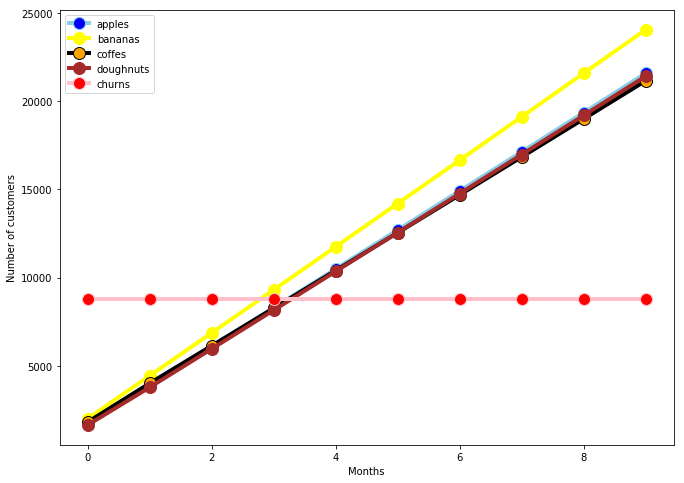

In [115]:
# plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(11,8))
plt.plot( [x for x in range(10)], apples, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='apples')
plt.plot( [x for x in range(10)], bananas, marker='o', markerfacecolor='yellow', markersize=12, color='yellow', linewidth=4,label='bananas')
plt.plot( [x for x in range(10)], coffees, marker='o', markerfacecolor='orange', markersize=12, color='black', linewidth=4,label='coffes')
plt.plot( [x for x in range(10)], doughnuts, marker='o', markerfacecolor='brown', markersize=12, color='brown', linewidth=4,label='doughnuts')
plt.plot( [x for x in range(10)], churns, marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=4,label='churns')
plt.legend(loc='best')
plt.xlabel('Months')
plt.ylabel('Number of customers')

### Insights

* 1 Churn is a state that has ´'equilibrium' since inception, hence recommendation to run A/B testing to reduce it would come first

* 2 Product analysis would come in either later or as a subset of the churn explanation/reduction

* 3 Implement month on month Probability matrix to run a deeper level explanation on churn and consumer choices - will also reduce inherent error of the model and prevent from implementing hidden Markov.

* 4 Same methodology will apply to understand CLV/revenue - just replacing user count by price and running the implemented model (low operational cost)